In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN  # kNN detector
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.data import generate_data
import numpy as np

In [3]:
file = pd.read_csv('./students_dataset.csv')

In [4]:
merged = pd.concat([file, pd.get_dummies(file.degree)], axis='columns')
merged = pd.concat([merged, pd.get_dummies(merged.university_course_id)], axis='columns')
# drop the values
merged = merged.drop(['degree','university_course_id','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis='columns')

In [5]:
from pycaret.anomaly import *
exp_name = setup(data = merged, normalize = True, 
                   ignore_features = ['course_id', 'user_id_x'],
                   session_id = 123)
knn = create_model('knn')
forest = create_model('iforest')
svm = create_model('svm', fraction = 0.025)

knn_df = assign_model(knn)

In [6]:
svm_df = assign_model(svm)

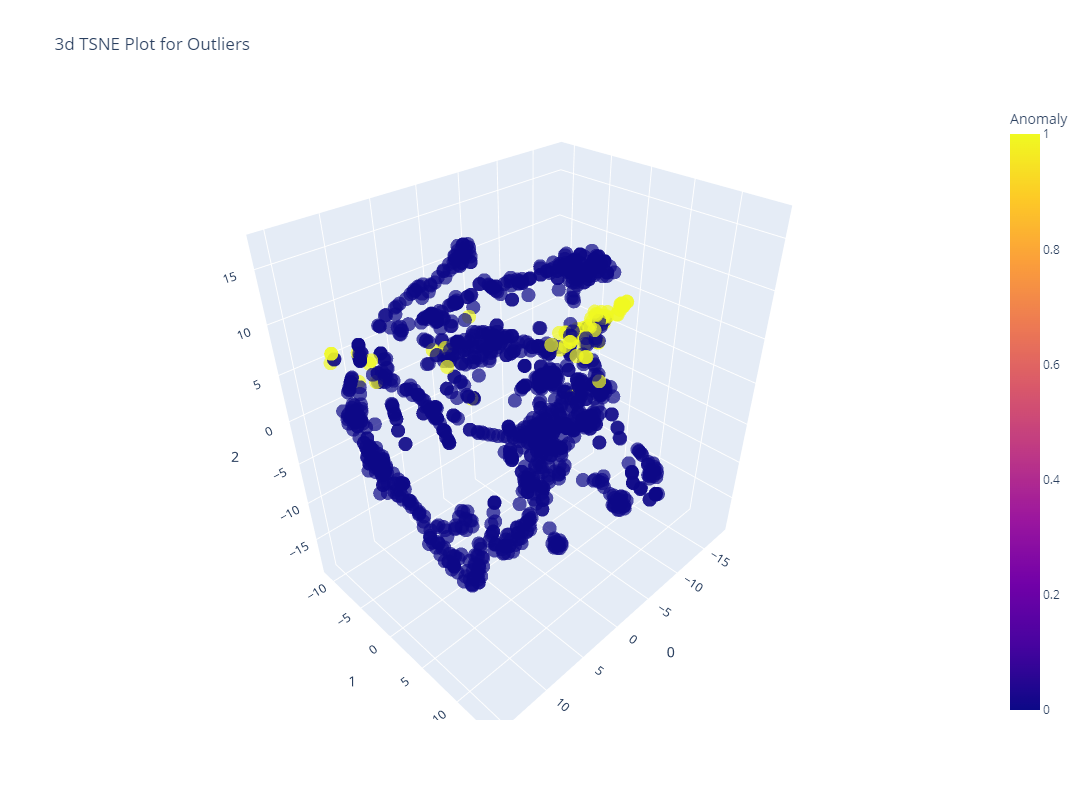

In [7]:
plot_model(knn, plot = 'tsne')

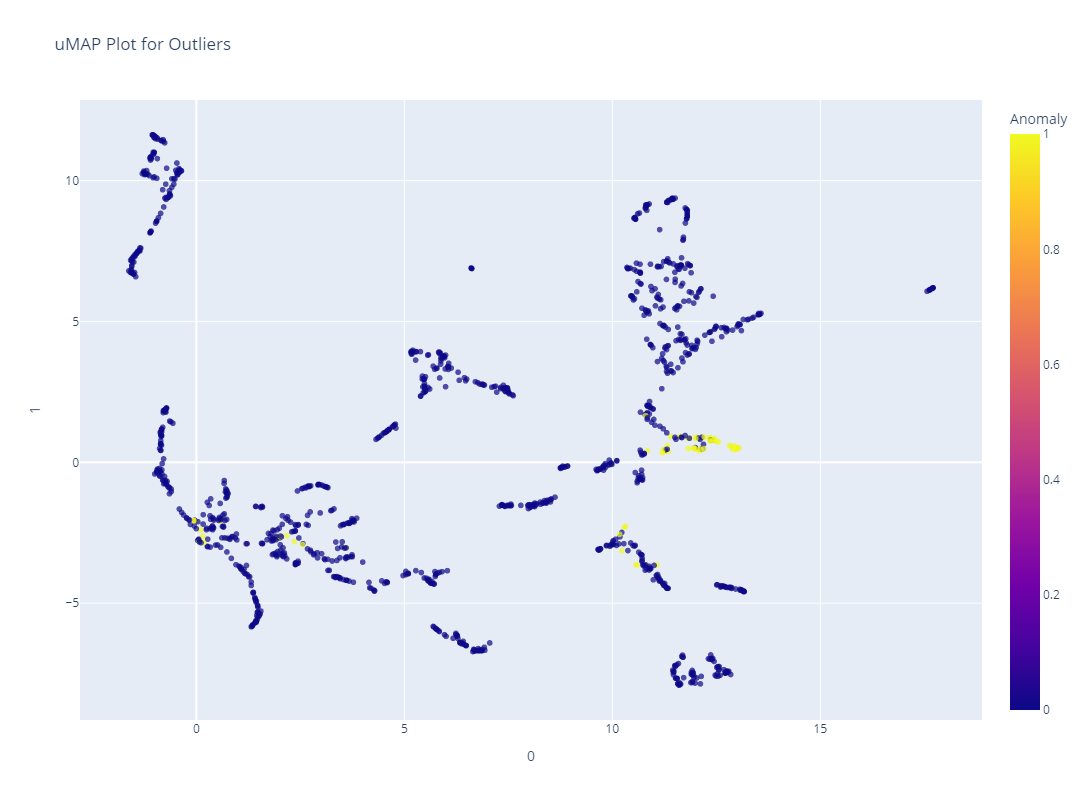

In [8]:
plot_model(knn, plot = 'umap')


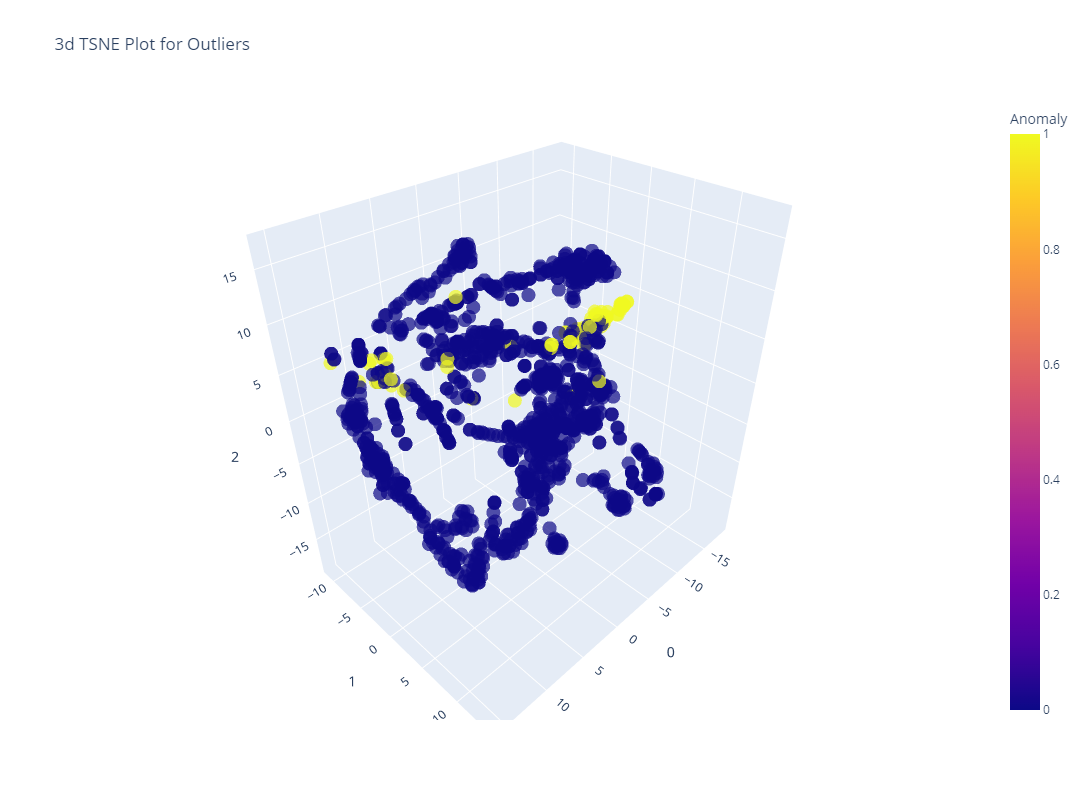

In [9]:
plot_model(forest, plot = 'tsne')

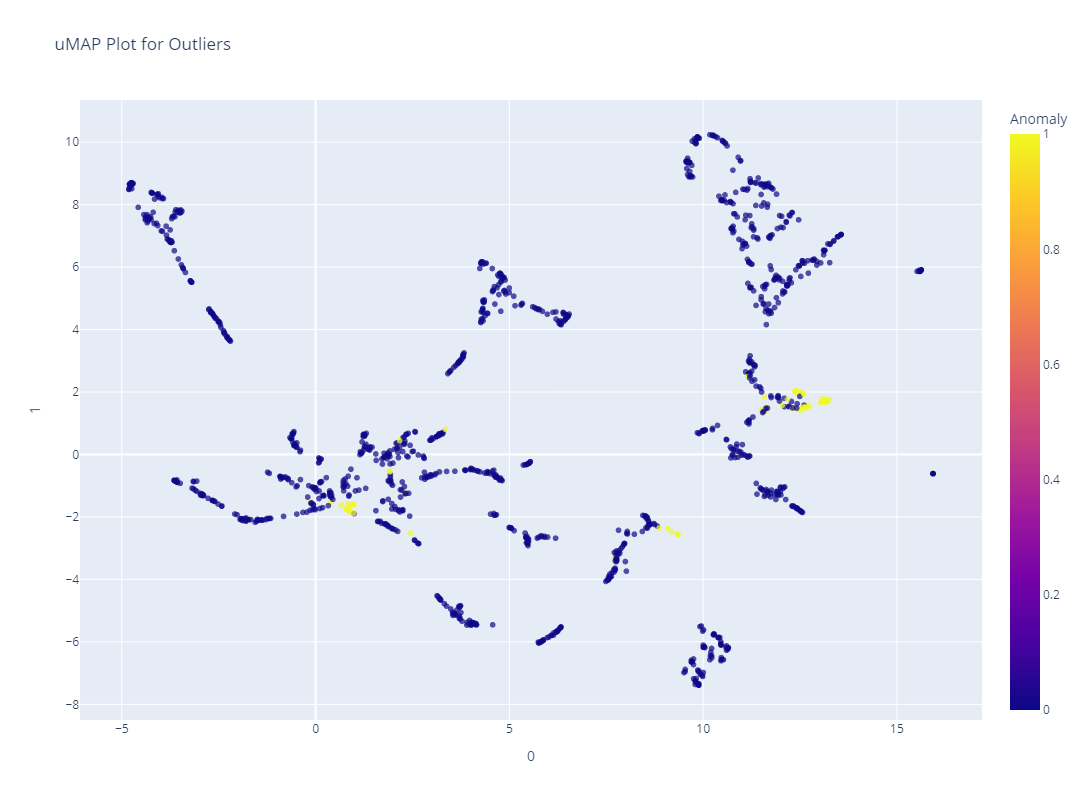

In [10]:
plot_model(forest, plot = 'umap')

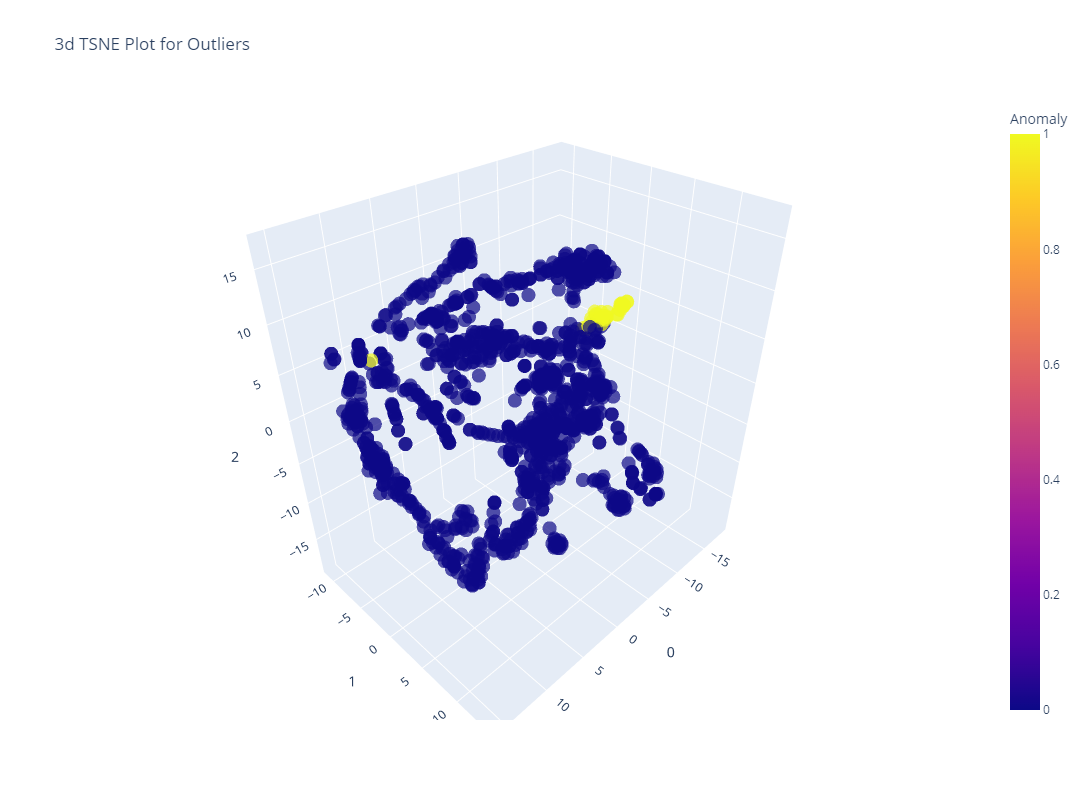

In [11]:
plot_model(svm, plot = 'tsne')

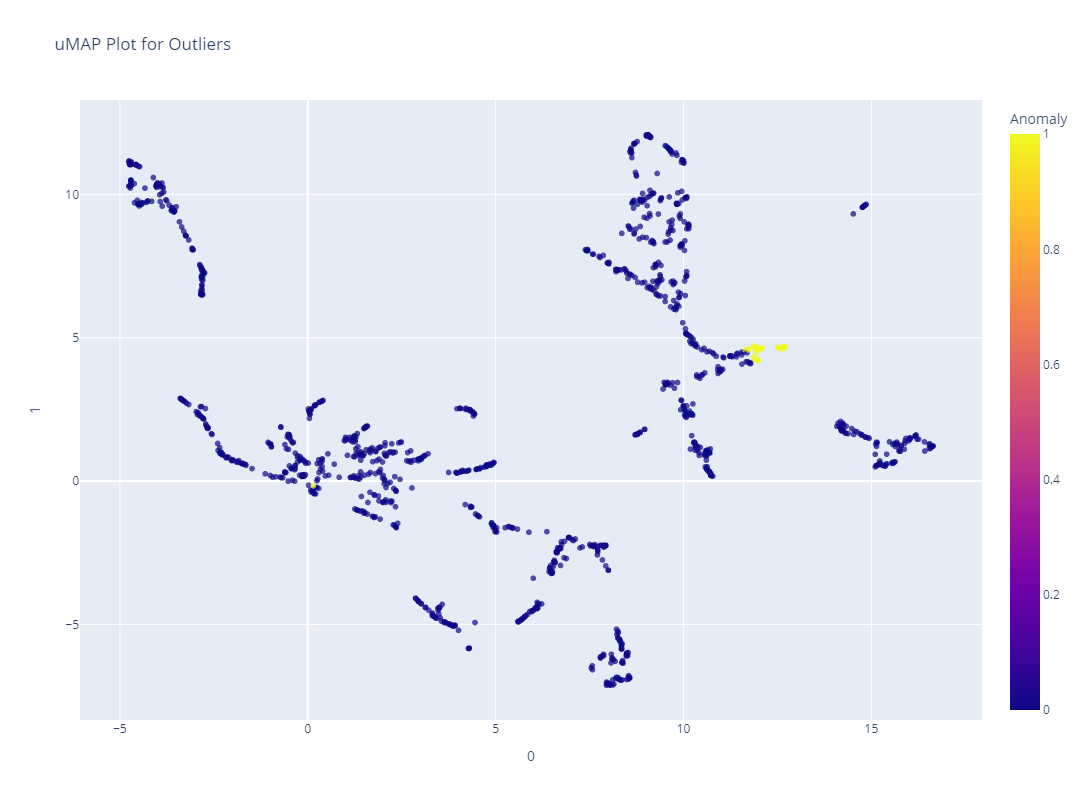

In [12]:
plot_model(svm, plot = 'umap')

In [13]:
svm_df[svm_df.Anomaly == 1]

course_id  user_id_x  BUILD_ERROR  FAILURE  TIME_OUT  RUNTIME_ERROR  \
239           9        240            1      106         7             38   
240           9        240            1      106         7             38   
243           9        257            3       79         4             26   
244           9        258           12      123         8             61   
245           9        258           12      123         8             61   
246           9        261            9      110         5             50   
247           9        261            9      110         5             50   
258           9        270           10       73         3             32   
259           9        270           10       73         3             32   
264           9        274            3       81         1             26   
272           9        285            5       72         2             17   
273           9        285            5       72         2             17   
292           9        377            6       93         3             57   
293           9        377            6       93         3             57   
307           9        424            0      105         5             44   
308           9        424            0      105         5             44   
722          13        853           63       38         2              1   
840          14        617            9       73         3             33   
841          14        617            9       73         3             33   
858          14        706            3       70         4             20   
859          14        706            3       70         4             20   
862          14        710            8       70         3             28   
868          14        732           10       81         6             30   
869          14        732           10       81         6             30   
873          14        736            2       72         3             35   
875          14        738            9       80         2             14   
880          14        743            5       91         1             28   
888          14        752            8       80         1             25   
889          14        752            8       80         1             25   
910          14        962            9       73         1             26   
911          14        962            9       73         1             26   
922          14       1153           10      100         5             50   
923          14       1153           10      100         5             50   
1280         32        890            0       74         5             33   
1283         32        897            0       74         9             56   

      SUCCESS  courses_per_semester  Ingeniería Civil  \
239       101                     1                 0   
240       101                     1                 0   
243       179                     1                 0   
244       130                     1                 0   
245       130                     1                 0   
246       166                     1                 0   
247       166                     1                 0   
258        79                     1                 0   
259        79                     1                 0   
264       114                     1                 0   
272       108                     1                 0   
273       108                     1                 0   
292       103                     1                 0   
293       103                     1                 0   
307       119                     1                 0   
308       119                     1                 0   
722        68                     1                 0   
840        83                     1                 0   
841        83                     1                 0   
858       130                     1                 0   
859       130                     1 

In [14]:
svm_df[svm_df.Anomaly == 1].describe()

course_id    user_id_x  BUILD_ERROR     FAILURE   TIME_OUT  \
count  35.000000    35.000000    35.000000   35.000000  35.000000   
mean   12.714286   576.342857     7.914286   85.057143   3.885714   
std     5.399191   286.417316    10.308111   18.060263   2.219849   
min     9.000000   240.000000     0.000000   38.000000   1.000000   
25%     9.000000   272.000000     3.000000   73.000000   2.000000   
50%    14.000000   617.000000     8.000000   80.000000   3.000000   
75%    14.000000   747.500000     9.500000  100.000000   5.000000   
max    32.000000  1153.000000    63.000000  123.000000   9.000000   

       RUNTIME_ERROR     SUCCESS  courses_per_semester  Ingeniería Civil  \
count      35.000000   35.000000                  35.0              35.0   
mean       34.657143  113.171429                   1.0               0.0   
std        14.586341   26.407982                   0.0               0.0   
min         1.000000   59.000000                   1.0               0.0   
25%        26.000000  101.000000                   1.0               0.0   
50%        32.000000  115.000000                   1.0               0.0   
75%        47.000000  130.000000                   1.0               0.0   
max        61.000000  179.000000                   1.0               0.0   

       Ingeniería Electricista  ...  Licenciatura en Sistemas  75.01-95.01  \
count                35.000000  ...                  35.00000    35.000000   
mean                  0.028571  ...                   0.20000     0.057143   
std                   0.169031  ...                   0.40584     0.235504   
min                   0.000000  ...                   0.00000     0.000000   
25%                   0.000000  ...                   0.00000     0.000000   
50%                   0.000000  ...                   0.00000     0.000000   
75%                   0.000000  ...                   0.00000     0.000000   
max                   1.000000  ...                   1.00000     1.000000   

       75.06  75.40  75.40-95.40      75.41  75.41-95.41  LABI  Anomaly  \
count   35.0   35.0    35.000000  35.000000    35.000000  35.0     35.0   
mean     0.0    0.0     0.542857   0.257143     0.142857   0.0      1.0   
std      0.0    0.0     0.505433   0.443440     0.355036   0.0      0.0   
min      0.0    0.0     0.000000   0.000000     0.000000   0.0      1.0   
25%      0.0    0.0     0.000000   0.000000     0.000000   0.0      1.0   
50%      0.0    0.0     1.000000   0.000000     0.000000   0.0      1.0   
75%      0.0    0.0     1.000000   0.500000     0.000000   0.0      1.0   
max      0.0    0.0     1.000000   1.000000     1.000000   0.0      1.0   

       Anomaly_Score  
count      35.000000  
mean      325.657881  
std        79.438468  
min       195.923732  
25%       264.051777  
50%       304.172836  
75%       399.557336  
max       458.142816  

[8 rows x 27 columns]

In [16]:
svm_df.to_csv("data_with_anomalies.csv", index=False)